<a href="https://colab.research.google.com/github/IamHarshitRajpal/MultiThreading/blob/main/Harshit_102103683.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTITHREADING

Multiplying  100 random matrices of size 1k x 1k  with a constant matrix(1k x1k) using multithreading

Label(value='Random Number: ')

+------------------+---------+---------+--------+--------+--------+--------+--------+------+--------+-------+
| Threads          | T=1     | T=2     | T=3    | T=4    | T=5    | T=6    | T=7    | T=8  | T=9    | T=10  |
+------------------+---------+---------+--------+--------+--------+--------+--------+------+--------+-------+
| Time taken (sec) | 16.1795 | 15.0873 | 7.3237 | 5.9967 | 7.3755 | 5.9734 | 7.5334 | 5.96 | 7.3899 | 6.032 |
+------------------+---------+---------+--------+--------+--------+--------+--------+------+--------+-------+


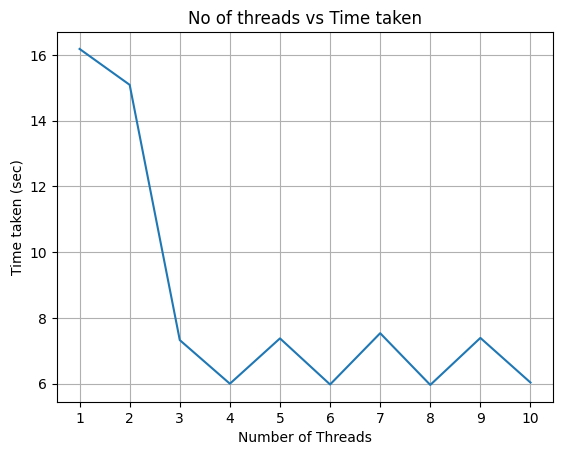

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import random
import threading
import time

class RandomNumberDashboard:
    def __init__(self):
        self.label = widgets.Label(value="Random Number: ")
        self.refresh_rate = 1  # Default refresh rate in seconds
        self.running = False

        # Create buttons to change refresh rates
        self.btn_slow = widgets.Button(description="Slow")
        self.btn_medium = widgets.Button(description="Medium")
        self.btn_fast = widgets.Button(description="Fast")

        self.btn_slow.on_click(lambda _: self.change_refresh_rate(3))
        self.btn_medium.on_click(lambda _: self.change_refresh_rate(2))
        self.btn_fast.on_click(lambda _: self.change_refresh_rate(1))

        self.start_button = widgets.Button(description="Start")
        self.stop_button = widgets.Button(description="Stop")

        self.start_button.on_click(lambda _: self.start_dashboard())
        self.stop_button.on_click(lambda _: self.stop_dashboard())

        display(self.label)
        display(widgets.HBox([self.btn_slow, self.btn_medium, self.btn_fast]))
        display(widgets.HBox([self.start_button, self.stop_button]))

    def start_dashboard(self):
        self.running = True
        self.update_random_number()

    def stop_dashboard(self):
        self.running = False

    def update_random_number(self):
        while self.running:
            random_number = random.randint(0, 100)
            self.label.value = f"Random Number: {random_number}"
            time.sleep(self.refresh_rate)

    def change_refresh_rate(self, rate):
        self.refresh_rate = rate

# Create and display the dashboard
dashboard = RandomNumberDashboard()
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

def matrix_multiply(A, B, result, index):
    result[index] = np.dot(A, B)

def run_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=matrix_multiply, args=(A, matrix, results, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

A = np.random.rand(1000, 1000)

results = [None] * 100

matrices = [np.random.rand(1000, 1000) for _ in range(100)] # random matrices

results_table = []
num_threads=list(range(1,11))
time_taken=[]
for num_t in num_threads:
    ttime= run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime,4)))

ans = list(zip(*results_table))

print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

plt.plot(num_threads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads vs Time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()
